# 1 线性回归图

用于展示数据点与回归直线之间关系的可视化图表，拟合一条直线建模自变量与因变量之间的线性关系

## 1.1 回归基本概念

自变量X与因变脸Y存在如下线性关系

$$
Y = \beta_0 + \beta_l * X + e
$$

- e:误差
- β0：截距
- βl：斜率，回归系数

图像构成：回归拟合曲线（最小化数据点到回归直线的垂直距离之和）+数据点

## 1.3 适用场景

- 可视化趋势：
- 判断拟合效果
- 预测


## 1.4 sns.regplot()

- x:
- y:
- data:
- scatter:bool值,是否绘制散点
- order：回归线的多项式阶数
- ci：置信区间大小
- fit_reg:控制是否绘制回归线
- color：绘图颜色
- scatter_kws：设置散点样式
- line_kws:设置回归线样式

## 1.5 案例


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joypy
import warnings

# 忽略警告
warnings.filterwarnings('ignore')
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

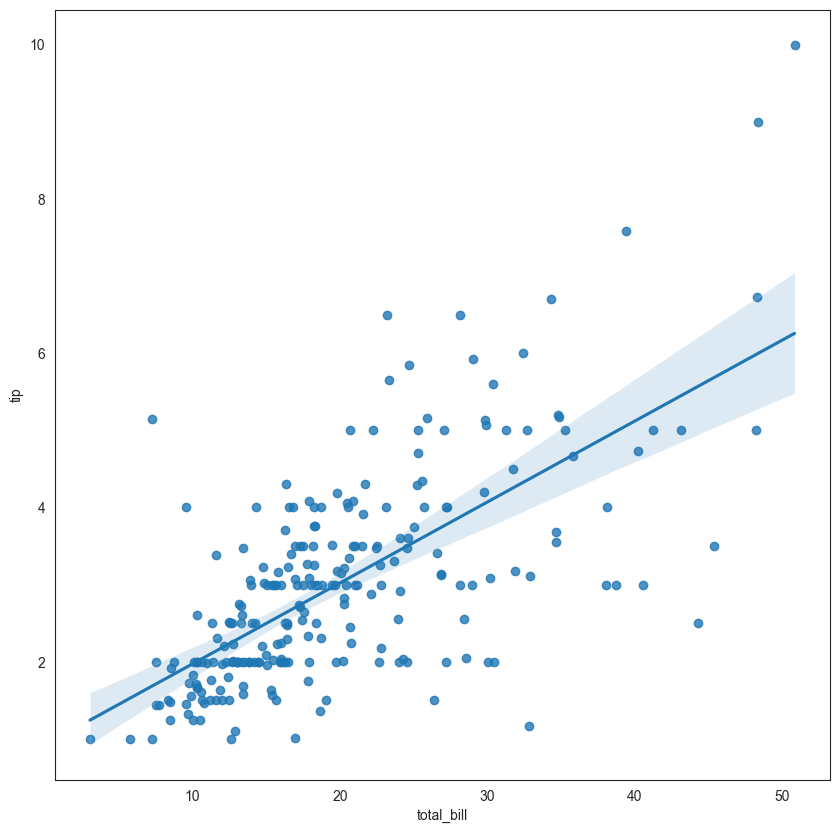

In [2]:
sns.set_style("white")
plt.figure(figsize=(10,10))

sns.regplot(data=tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

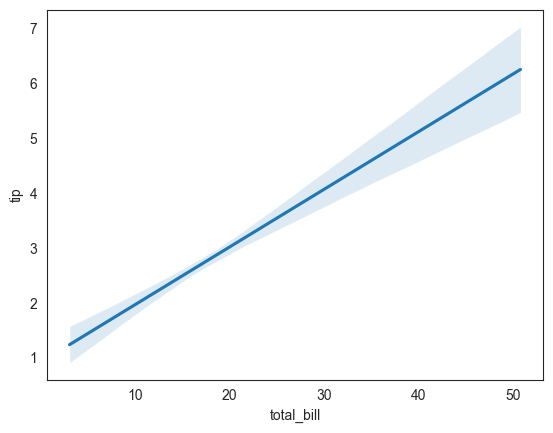

In [3]:
sns.regplot(data=tips, x="total_bill", y="tip",scatter=False)

<Axes: xlabel='total_bill', ylabel='tip'>

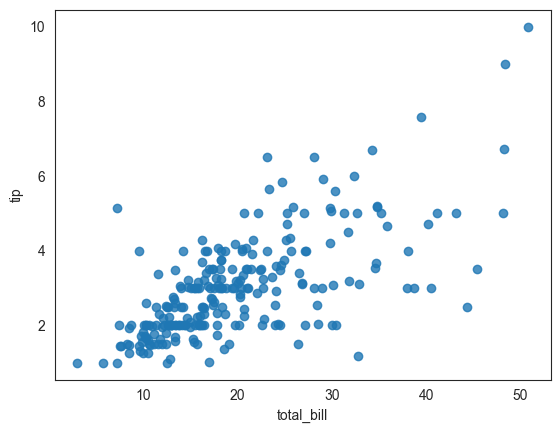

In [4]:
sns.regplot(data=tips, x="total_bill", y="tip",fit_reg=False)

<Axes: xlabel='total_bill', ylabel='tip'>

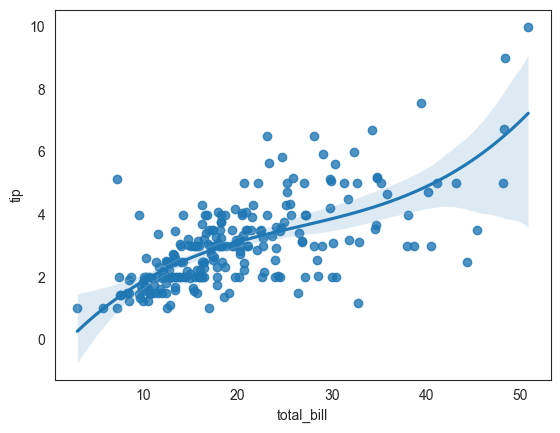

In [5]:
sns.regplot(data=tips, x="total_bill", y="tip",order=3)

<Axes: xlabel='total_bill', ylabel='tip'>

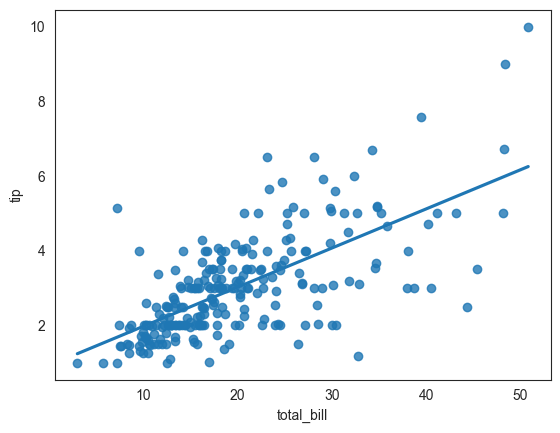

In [6]:
# ci=None不需要置信区间
sns.regplot(data=tips, x="total_bill", y="tip",ci=0.95)

### 1.3.2 color设置颜色

颜色清单

![](../picture/B-kdeplot-1.png)


### 1.3.3 设置线条格式和点格式

![img](../picture/B-regplot-1.png)

<Axes: xlabel='total_bill', ylabel='tip'>

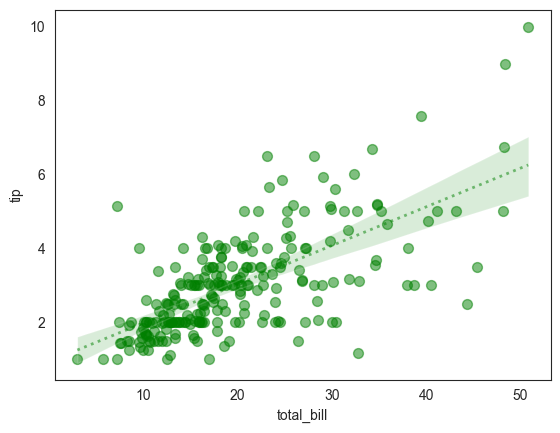

In [7]:
# 点格式 s大小，color颜色，alpha透明度
sns.regplot(data=tips, x="total_bill", y="tip",color="red",
            scatter_kws={"s": 50,'color':'green','alpha':0.5},
            line_kws={'color':'green','alpha':0.5,'ls':':','lw':2})

### 1.3.4 添加回归线方程

numpy.polyfit(x,y,deg)

- x:自变量
- Y:因变量
- deg:拟合次数，deg=1线性回归，deg=2二次回归

获取系数

最后使用plt.text(x,y,text,fontsize,color),
- x,y:位置，和图表的横纵坐标一样
- text：文本，支持latex
- 其他：字号、颜色等

Text(5, 9, 'y = 0.00013x^3 + -0.01054x^2 + 0.34908x + -0.70589')

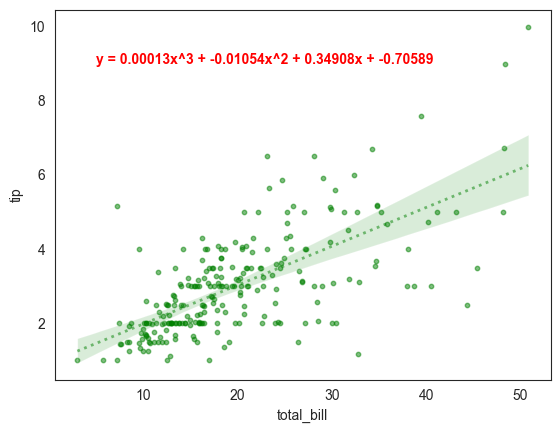

In [13]:
# 点格式 s大小，color颜色，alpha透明度
sns.regplot(data=tips, x="total_bill", y="tip",color="red",
            scatter_kws={"s": 10,'color':'green','alpha':0.5},
            line_kws={'color':'green','alpha':0.5,'ls':':','lw':2})

# 提取数据
x = tips['total_bill'].values
y = tips['tip']

# 使用scipy的polyfit进行三次拟合回归
coefficients = np.polyfit(x, y, 3)

# 创建回归方程表达式
a,b,c,d = coefficients
equation = f'y = {a:.5f}x^3 + {b:.5f}x^2 + {c:.5f}x + {d:.5f}'

# 在图表上添加回归方程文本，坐标为（2，9）
plt.text(5,9,equation,fontsize=10, fontweight='bold',color='red')

### 1.3.5 计算R-squared值

R_2(R-squared),也称为决定系数，是回归中衡量模型拟合优度的重要指标，表示模型解释了目标变量的变异程度，告诉我们自变量或特征对因变量变化的解释能力大小

R_2定义是 1 - 模型残差平方和（RSS）与总平方和（TSS）

$$
R_2 = 1 - \frac{RSS}{TSS}
$$

其中，TSS总平方和（total sum of squares）：是目标变量的总变异性，等同于目标变量的每个**观测值**与其**平均值**的差异的平方和

$$
TSS = \sum_{i=1}^n({y_i - \bar{y}})^2
$$
RSS（残差平方和，residual sum of squares），回归模型**预测值**与**实际值**之间的差异的平方和，即回归线无法解释的数据变异部分
$$
TSS = \sum_{i=1}^n({y_i - \hat{y}})^2
$$

取值范围

- R_2 = 1，表示完美拟合，模型能完全解释因变量的变异性
- R_2 = 0，模型能不能解释数据的任何变异，模型的拟合效果与之间使用目标变量的均值一样
- R_2 < 0，一般R_2 > 0 ，但特别糟糕也可能为负数，表示模型预测效果更差


Text(5, 8, 'R2:0.47287')

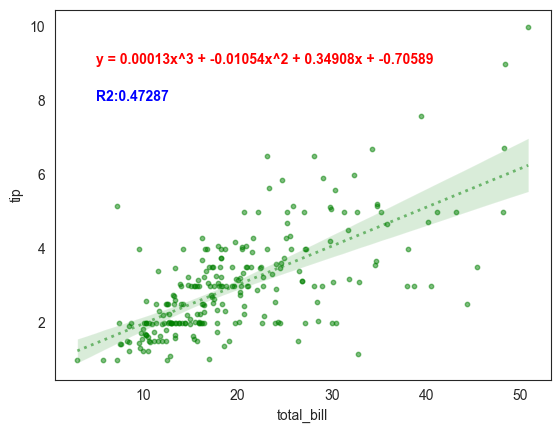

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# 点格式 s大小，color颜色，alpha透明度
sns.regplot(data=tips, x="total_bill", y="tip",color="red",
            scatter_kws={"s": 10,'color':'green','alpha':0.5},
            line_kws={'color':'green','alpha':0.5,'ls':':','lw':2})

# 提取数据
x = tips['total_bill'].values
y = tips['tip']

# 使用scipy的polyfit进行三次拟合回归
coefficients = np.polyfit(x, y, 3)

# 创建回归方程表达式
a,b,c,d = coefficients
equation = f'y = {a:.5f}x^3 + {b:.5f}x^2 + {c:.5f}x + {d:.5f}'

# 计算预测值
y_pred = np.polyval(coefficients, x)

# 计算R2
r_squared = r2_score(y, y_pred)

# 在图表上添加回归方程文本，坐标为（2，9）
plt.text(5,9,equation,fontsize=10, fontweight='bold',color='red')

# 在图表上添加R2
plt.text(5,8,f"R2={r_squared:.5f}",fontsize=10, fontweight='bold',color='blue')


### 1.3.6 计算RMSE值


均方根误差（root mean squared error）衡量回归模型拟合效果的常用指标，预测值与实际值之差的平方求平均，再开平方根

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n{(y_{pred} - y_i) ^ 2}}
$$



Text(15, 8, 'rmse=1.00251')

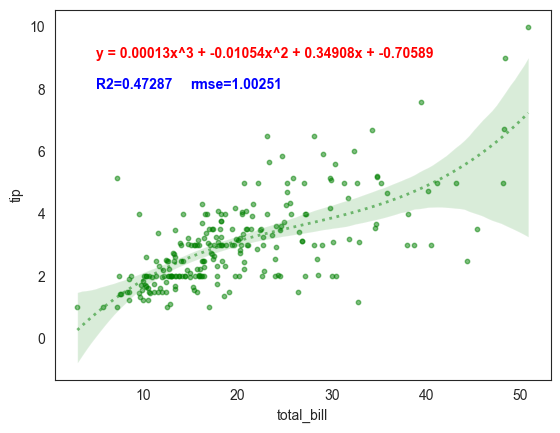

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# 点格式 s大小，color颜色，alpha透明度
sns.regplot(data=tips, x="total_bill", y="tip",color="red",order=3,
            scatter_kws={"s": 10,'color':'green','alpha':0.5},
            line_kws={'color':'green','alpha':0.5,'ls':':','lw':2})

# 提取数据
x = tips['total_bill'].values
y = tips['tip']

# 使用scipy的polyfit进行三次拟合回归
coefficients = np.polyfit(x, y, 3)

# 创建回归方程表达式
a,b,c,d = coefficients
equation = f'y = {a:.5f}x^3 + {b:.5f}x^2 + {c:.5f}x + {d:.5f}'

# 计算预测值
y_pred = np.polyval(coefficients, x)

# 计算R2和RMSE
r_squared = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# 在图表上添加回归方程文本，坐标为（2，9）
plt.text(5,9,equation,fontsize=10, fontweight='bold',color='red')

# 在图表上添加R2
plt.text(5,8,f"R2={r_squared:.5f}",fontsize=10, fontweight='bold',color='blue')
plt.text(15,8,f"rmse={rmse:.5f}",fontsize=10, fontweight='bold',color='blue')
